<div class="alert alert-info">
<h1>Multiple Regression</h1>
<h4>Environmental Statistics 1</h4>
    
Ikedichi E. Azuh / C.F. Dormann
</div>

## 1.0 Set Up
Set up a Jupyter Notebook by simply downloading and installing Anaconda3 (https://www.anaconda.com/download). Jupyter Notebook is one of the coding tools contained in the Anaconda Navigator used for interactive coding and also allows for remote hosting. Set up your Jupyter Notebook with your name and a meaningful title and render it as PDF. Save as template for all exercises this term. To learn more about Jupyter Notebook see: <br>
https://realpython.com/jupyter-notebook-introduction/
https://jupyter-notebook.readthedocs.io/en/stable/notebook.html.te).

In [1]:
# Call the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols


## 2.0 Exercise 1
In this concise exploration, we delve into the `insulgas` dataset from the 'faraway' package in R, focusing on gas consumption measurements of a house before and after insulation over several weeks. Initially, we'll conduct a univariate regression analysis to understand the relationship between gas consumption and insulation.

Building upon this foundation, we'll progress to multiple regression models, exploring both with and without interactions. By incorporating interaction terms, we aim to uncover nuanced relationships and potential synergies between insulation and other variables affecting gas consumption.

Through this approach, we gain valuable insights into the effectiveness of insulation in mitigating gas consumption and its interactions with various factors. This brief yet comprehensive analysis provides a practical demonstration of regression techniques, offering a glimpse into their application in understanding and optimizing energy efficiency in residential settings.

### 2.1 Plot relationships
Plot the relationship between outside temperature (Temp) and gas consumption (Gas) as a square scatter plot.
Use different colours or symbols to represent the phase before and after insulation (Insulate).

In [2]:
gas = pd.read_csv("insulgas.csv")
gas.describe()

,Temp,Gas
count,44.000000,44.000000
mean,4.311364,4.397727
std,2.726034,1.028543
min,-0.800000,2.600000
25%,2.500000,3.675000
50%,4.200000,4.150000
75%,6.225000,4.825000
max,10.200000,7.200000


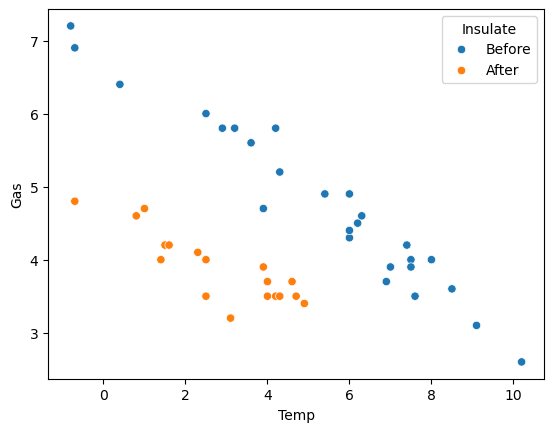

In [2]:
# Now the plot
sns.scatterplot(x="Temp",
                y="Gas",
                hue="Insulate",
                data=gas)
plt.show()

## 2.2 Univariate Regressions
Analyse, in two separate regressions, the effect of Temp and Insulate on gas consumption. Present the pvalue of the effects, e.g. using summary. Summarise the result of the two regressions in a sentence, particularly the effect’s direction, its strength and its significance. Do not refer to the variables by their variable names, but by their correct terms (e.g. “temperature”, not “Temp”)!

In [3]:
# Regression of Temp on Gas
fTemp = ols("Gas ~ Temp", data=gas).fit()

print(fTemp.summary())

                            OLS Regression Results                            
Dep. Variable:                    Gas   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     20.48
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           4.89e-05
Time:                        12:02:45   Log-Likelihood:                -54.427
No. Observations:                  44   AIC:                             112.9
Df Residuals:                      42   BIC:                             116.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3291      0.243     21.959      0.0

In [4]:
# Regression of Insulate on Gas
fInsu = ols("Gas ~ Insulate", data=gas).fit()

print(fInsu.summary())

                            OLS Regression Results                            
Dep. Variable:                    Gas   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     8.809
Date:                Fri, 08 Mar 2024   Prob (F-statistic):            0.00493
Time:                        12:02:46   Log-Likelihood:                -58.977
No. Observations:                  44   AIC:                             122.0
Df Residuals:                      42   BIC:                             125.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.8889      0

Both effects are significant, with the negative temperature effect explaining twice as much variation in gas consumption as the positive effect of insulation.

## 2.3 Multivariate Regression
Now run a multiple regression, in this case also called ANCOVA (analysis of co-variance) with both predictors in the same model. Compare the output to the two previous outputs: state what has changed, and in which direction.

In [5]:
# Regression of Temp and Insulate on Gas
fm = ols("Gas ~ Temp + Insulate", data=gas).fit()
print(fm.summary())

                            OLS Regression Results                            
Dep. Variable:                    Gas   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     233.5
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           3.91e-23
Time:                        12:02:49   Log-Likelihood:                -7.7956
No. Observations:                  44   AIC:                             21.59
Df Residuals:                      41   BIC:                             26.94
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.9225      0

Together both variables explain much more than the univariate regressions combined (90% rather than 30%+15%); their effects have become stronger (in absolute terms), the errors much smaller and the significances even stronger.

## 2.4 Multivariate Regression with Interaction
Finally, run the multiple regression but allow for a statistical interaction between the two predictors. Again: describe what changed, possibly in several sentences and with reference to the initial plot.

In [6]:
# Regression of Temp*Insulate on Gas
fint = ols("Gas ~ Temp*Insulate", data=gas).fit()
print(fint.summary())

fint.params

                            OLS Regression Results                            
Dep. Variable:                    Gas   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     194.8
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           6.77e-24
Time:                        12:02:51   Log-Likelihood:                -2.7150
No. Observations:                  44   AIC:                             13.43
Df Residuals:                      40   BIC:                             20.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Intercept                  4.590618
Insulate[T.Before]         2.263210
Temp                      -0.249627
Temp:Insulate[T.Before]   -0.143612
dtype: float64

This model adds another estimate for the interaction, which is significant. The model fit has improved again, but not by much. The effect of insulation has increased again, suggesting that it is much stronger at cold than at warm temperatures. This is visible in the initial plot, where the distance between gas consumption before and after insulation is largest at the lowest temperature.

## 2.4 Plot Fitted Model into Data
Make a “production quality” plot, i.e. including proper labels and units. Add regression lines and 95%- confidence intervals to the initial plot. (Remember that the 95%-CI is 2 times the standard error of the prediction in either direction of the expected value. The standard error is returned, by some R-functions, using the argument se.fit=TRUE.)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.765356,0.155442,4.451196,5.079517,4.135810,5.394902
1,4.751377,0.153381,4.441382,5.061372,4.123900,5.378855
2,4.737398,0.151326,4.431557,5.043239,4.111962,5.362834
3,4.723419,0.149277,4.421720,5.025118,4.099998,5.346840
4,4.709440,0.147234,4.411870,5.007010,4.088007,5.330873


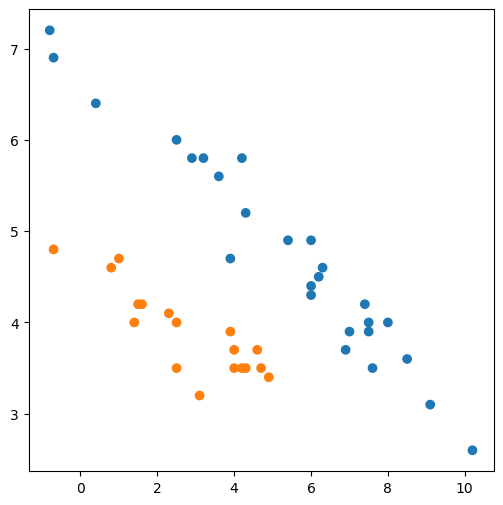

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))
colors = {'Before':'tab:blue', 'After':'tab:orange'}
ax.scatter(gas['Temp'], gas['Gas'], c=gas['Insulate'].map(colors))

min1 = min(gas.Temp[gas.Insulate=="Before"]) # -0.8
max1 = max(gas.Temp[gas.Insulate=="Before"]) # 10.2
newTempBefore = np.linspace(min1, max1, num=101) # numpy.ndarray

min2 = min(gas.Temp[gas.Insulate=="After"]) # -0.7
max2 = max(gas.Temp[gas.Insulate=="After"]) # 4.9
newTempAfter = np.linspace(min2, max2, num=101) # numpy.ndarray

# Convert to a dataframe
newTempBefore_df = pd.DataFrame(list(newTempBefore), columns=["Temp"])
newTempBefore_df['Insulate'] = "Before"
newTempAfter_df = pd.DataFrame(list(newTempAfter), columns=["Temp"])
newTempAfter_df['Insulate'] = "After"

# Prediction
'''
mean_ci refers to the confidence interval and obs_ci refers to the prediction interval.
'''
preds_Before = fint.get_prediction(newTempBefore_df).summary_frame(alpha=0.05)
preds_After = fint.get_prediction(newTempAfter_df).summary_frame(alpha=0.05)
preds_After.head()

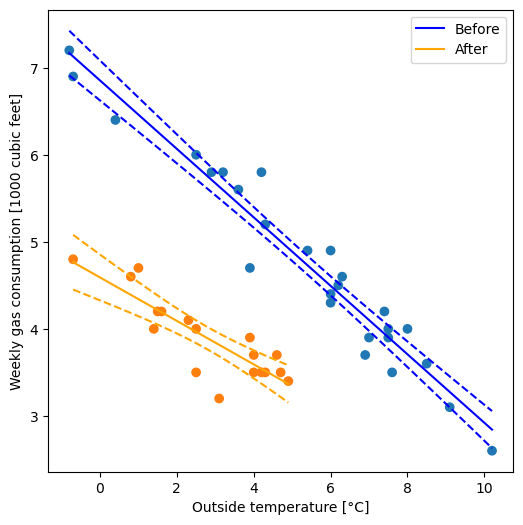

In [8]:
# main plot
fig, ax = plt.subplots(figsize=(6, 6))
colors = {'Before':'tab:blue', 'After':'tab:orange'}
ax.scatter(gas['Temp'], gas['Gas'], c=gas['Insulate'].map(colors))

# Before
plt.plot(newTempBefore_df['Temp'], preds_Before['mean'], color='blue', label='Before')
plt.plot(newTempBefore_df['Temp'], preds_Before['mean_ci_lower'], color='b', linestyle='--')
plt.plot(newTempBefore_df['Temp'], preds_Before['mean_ci_upper'], color='b', linestyle='--')

# After
plt.plot(newTempAfter_df['Temp'], preds_After['mean'], color='orange', label='After')
plt.plot(newTempAfter_df['Temp'], preds_After['mean_ci_lower'], color='orange', linestyle='--')
plt.plot(newTempAfter_df['Temp'], preds_After['mean_ci_upper'], color='orange', linestyle='--')
         
# Set common labels
ax.set_ylabel('Weekly gas consumption [1000 cubic feet]')
ax.set_xlabel('Outside temperature [°C]')
leg = plt.legend()

#plt.savefig('gas_temp.png', dpi=300)
plt.show()